In [1]:
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor  
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('/home/merve/Desktop/data/data/H1.csv')
#data=data.apply(lambda col: pd.factorize(col, sort=True)[0])

data2 = pd.read_csv('/home/merve/Desktop/data/data/H2.csv')
#data2=data2.apply(lambda col: pd.factorize(col, sort=True)[0])


In [4]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dtypes = {
        'IsCanceled':'category',
        'LeadTime':'float64',
        'StaysInWeekendNights':'float64',
        'StaysInWeekNights':'float64',
        'Adults':'float64',
        'Children':'float64',
        'Babies':'float64',
        'Meal':'category',
        'Country':'category',
        'MarketSegment':'category',
        'DistributionChannel':'category',
        'IsRepeatedGuest':'float64',
        'PreviousCancellations':'float64',
        'PreviousBookingsNotCanceled':'float64',
        'ReservedRoomType':'category',
        'AssignedRoomType':'category',
        'BookingChanges':'float64',
        'DepositType':'category',
        'Agent':'category',
        'Company':'category',
        'DaysInWaitingList':'float64',
        'CustomerType':'category',
        'ADR':'float64',
        'RequiredCarParkingSpaces':'float64',
        'TotalOfSpecialRequests':'float64',
        'ReservationStatus':'category',
        'ArrivalDateYear':'category', 
        'ArrivalDateMonth':'category',
       'ArrivalDateWeekNumber':'category',
        'ArrivalDateDayOfMonth':'category',
        'ReservationStatusDate':'category'
        }
IsCanceled = data['IsCanceled']
y = IsCanceled
leadtime = data['LeadTime'] #1
staysweekendnights = data['StaysInWeekendNights'] #2
staysweeknights = data['StaysInWeekNights'] #3
adults = data['Adults'] #4
children = data['Children'] #5
babies = data['Babies'] #6
meal = data['Meal'] #7
country = data['Country'] #8
marketsegment = data['MarketSegment'] #9
distributionchannel = data['DistributionChannel'] #10
isrepeatedguest = data['IsRepeatedGuest'] #11
previouscancellations = data['PreviousCancellations'] #12
previousbookingsnotcanceled = data['PreviousBookingsNotCanceled'] #13
reservedroomtype = data['ReservedRoomType'] #14
assignedroomtype = data['AssignedRoomType'] #15
bookingchanges = data['BookingChanges'] #16
deptype = data['DepositType'] #17
agent = data['Agent'] #18
company = data['Company'] #19
dayswaitinglist = data['DaysInWaitingList'] #20
custype = data['CustomerType'] #21
adr = data['ADR'] #22
rcps = data['RequiredCarParkingSpaces'] #23
totalsqr = data['TotalOfSpecialRequests'] #24
reserv = data['ReservationStatus'] #25
ArrivalDateYear = data['ArrivalDateYear'] #26
ArrivalDateMonth = data['ArrivalDateMonth'] #27
ArrivalDateWeekNumber = data['ArrivalDateWeekNumber'] #28
ArrivalDateDayOfMonth = data['ArrivalDateDayOfMonth'] #29
ReservationStatusDate= data['ReservationStatusDate'] #30    


In [6]:
#data=data.replace('NaN', np.nan)
#data=data.replace('NULL', np.nan)

# Data Preprocessing

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
IsCanceled                     40060 non-null int64
LeadTime                       40060 non-null int64
ArrivalDateYear                40060 non-null int64
ArrivalDateMonth               40060 non-null object
ArrivalDateWeekNumber          40060 non-null int64
ArrivalDateDayOfMonth          40060 non-null int64
StaysInWeekendNights           40060 non-null int64
StaysInWeekNights              40060 non-null int64
Adults                         40060 non-null int64
Children                       40060 non-null int64
Babies                         40060 non-null int64
Meal                           40060 non-null object
Country                        39596 non-null object
MarketSegment                  40060 non-null object
DistributionChannel            40060 non-null object
IsRepeatedGuest                40060 non-null int64
PreviousCancellations          40060 non-null int64
Pr

In [8]:
data.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [9]:
print(len(data))
print(data.size)

40060
1241860


In [15]:
data=data.dropna(how='any')

In [17]:
for col in data.columns:
    if data[col].dtype == object:
        try:
            null = data[data[col].str.contains('NULL')]
            #nan = data[data[col].str.contains('NaN')]
        except:
            null = data[data[col].isnull()]
            #nan=data[data[col].isna()]
        print(f"Null raito: {round(len(null) / len(data), 3)} for {col}")
        #print(f"NaN raito: {round(len(nan) / len(data), 3)} for {col}")

Null raito: 0.0 for ArrivalDateMonth
Null raito: 0.0 for Meal
Null raito: 0.0 for Country
Null raito: 0.0 for MarketSegment
Null raito: 0.0 for DistributionChannel
Null raito: 0.0 for ReservedRoomType
Null raito: 0.0 for AssignedRoomType
Null raito: 0.0 for DepositType
Null raito: 0.199 for Agent
Null raito: 0.926 for Company
Null raito: 0.0 for CustomerType
Null raito: 0.0 for ReservationStatus
Null raito: 0.0 for ReservationStatusDate


In [18]:
dropped = data.drop('Company', axis=1)
cutted = dropped[(dropped.Country.notnull()) & (dropped.Agent.notnull())]
cutted['Children'] = cutted['Children'].fillna(cutted['Children'].mean())

In [19]:
print(len(cutted))
print(cutted.size)

39596
1187880


In [20]:
le = LabelEncoder()

for key,value in dtypes.items(): 
    if key is not 'Company':
        if value=='category' :
            cutted.loc[:, key] = le.fit_transform(cutted.loc[:, key])
        else:
            cutted.loc[:, key] = np.abs(stats.zscore(cutted[key]))
            cutted = cutted[cutted[key] <= 3]

In [21]:
data=cutted

In [22]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
2,0,0.887589,0,5,26,0,1.048486,0.936365,1.232805,0.294896,...,0.390711,0,174,0.075574,2,0.315969,0.384999,0.776471,1,95
3,0,0.825979,0,5,26,0,1.048486,0.936365,1.232805,0.294896,...,0.390711,0,100,0.075574,2,0.315969,0.384999,0.776471,1,95
4,0,0.815710,0,5,26,0,1.048486,0.482526,0.181887,0.294896,...,0.390711,0,73,0.075574,2,0.078200,0.384999,0.488816,1,96
5,0,0.815710,0,5,26,0,1.048486,0.482526,0.181887,0.294896,...,0.390711,0,73,0.075574,2,0.078200,0.384999,0.488816,1,96
6,0,0.959468,0,5,26,0,1.048486,0.482526,0.181887,0.294896,...,0.390711,0,174,0.075574,2,0.232441,0.384999,0.776471,1,96


# H2.csv

In [23]:
data2.size

2459230

In [24]:
data2.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [27]:
for col in data2.columns:
    if data2[col].dtype == object:
        try:
            null = data2[data2[col].str.contains('NULL')]
        except:
            null = data2[data2[col].isnull()]
        print(f"Null raito: {round(len(null) / len(data2), 3)} for {col}")

Null raito: 0.0 for ArrivalDateMonth
Null raito: 0.0 for Meal
Null raito: 0.0 for Country
Null raito: 0.0 for MarketSegment
Null raito: 0.0 for DistributionChannel
Null raito: 0.0 for ReservedRoomType
Null raito: 0.0 for AssignedRoomType
Null raito: 0.0 for DepositType
Null raito: 0.102 for Agent
Null raito: 0.953 for Company
Null raito: 0.0 for CustomerType
Null raito: 0.0 for ReservationStatus
Null raito: 0.0 for ReservationStatusDate


In [28]:
dropped = data2.drop('Company', axis=1)
cutted = dropped[(dropped.Agent.notnull()) & (dropped.Country.notnull())]
cutted['Children'] = cutted['Children'].fillna(cutted['Children'].mean())

In [29]:
le = LabelEncoder()

for key,value in dtypes.items(): 
    if key is not 'Company':
        if value=='category' :
            cutted.loc[:, key] = le.fit_transform(cutted.loc[:, key])
        else:
            cutted.loc[:, key] = np.abs(stats.zscore(cutted[key]))
            cutted = cutted[cutted[key] <= 3]

In [30]:
data2=cutted

In [31]:
data2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,0.934949,0,5,26,0,0.905155,0.110739,1.671966,0.24023,...,0.312647,0,5,0.157138,2,2.595210,0.148312,0.718462,1,41
1,1,0.195893,0,5,26,0,0.905155,1.454998,0.292025,0.24023,...,0.312647,0,8,0.157138,2,0.732580,0.148312,0.571018,0,39
2,1,0.403189,0,5,26,0,0.905155,1.454998,1.671966,0.24023,...,0.312647,0,8,0.157138,2,0.939539,0.148312,0.571018,0,10
3,1,0.159842,0,5,26,0,1.353124,1.454998,0.292025,0.24023,...,0.312647,0,8,0.157138,2,0.732580,0.148312,1.860498,0,33
4,1,0.087739,0,5,26,1,0.905155,0.110739,0.292025,0.24023,...,0.312647,0,8,0.157138,2,0.732580,0.148312,0.571018,0,2


# ...................

# ...................

In [32]:
X=data.drop('IsCanceled', axis=1)
y=data.IsCanceled.values.reshape(-1,1)

X2=data2.drop('IsCanceled', axis=1)
y2=data2.IsCanceled.values.reshape(-1,1)

H1.CSV


0    22842
1     9177
Name: IsCanceled, dtype: int64

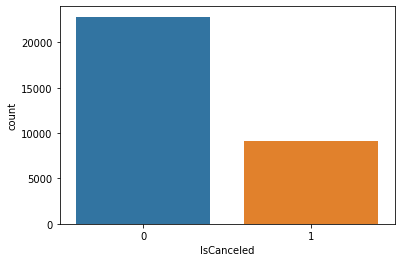

In [33]:
print("H1.CSV")
sns.countplot(x="IsCanceled", data=data)
data.loc[:,'IsCanceled'].value_counts()

H2.CSV


0    36989
1    24094
Name: IsCanceled, dtype: int64

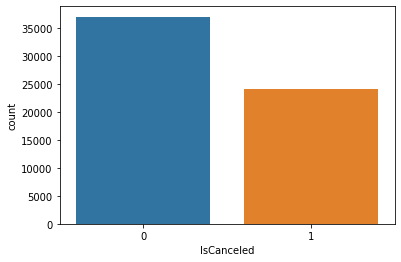

In [34]:
print("H2.CSV")
sns.countplot(x="IsCanceled", data=data2)
data2.loc[:,'IsCanceled'].value_counts()

# Feature Selection

## Filter Method

### Corelation Matrix with HeatMap

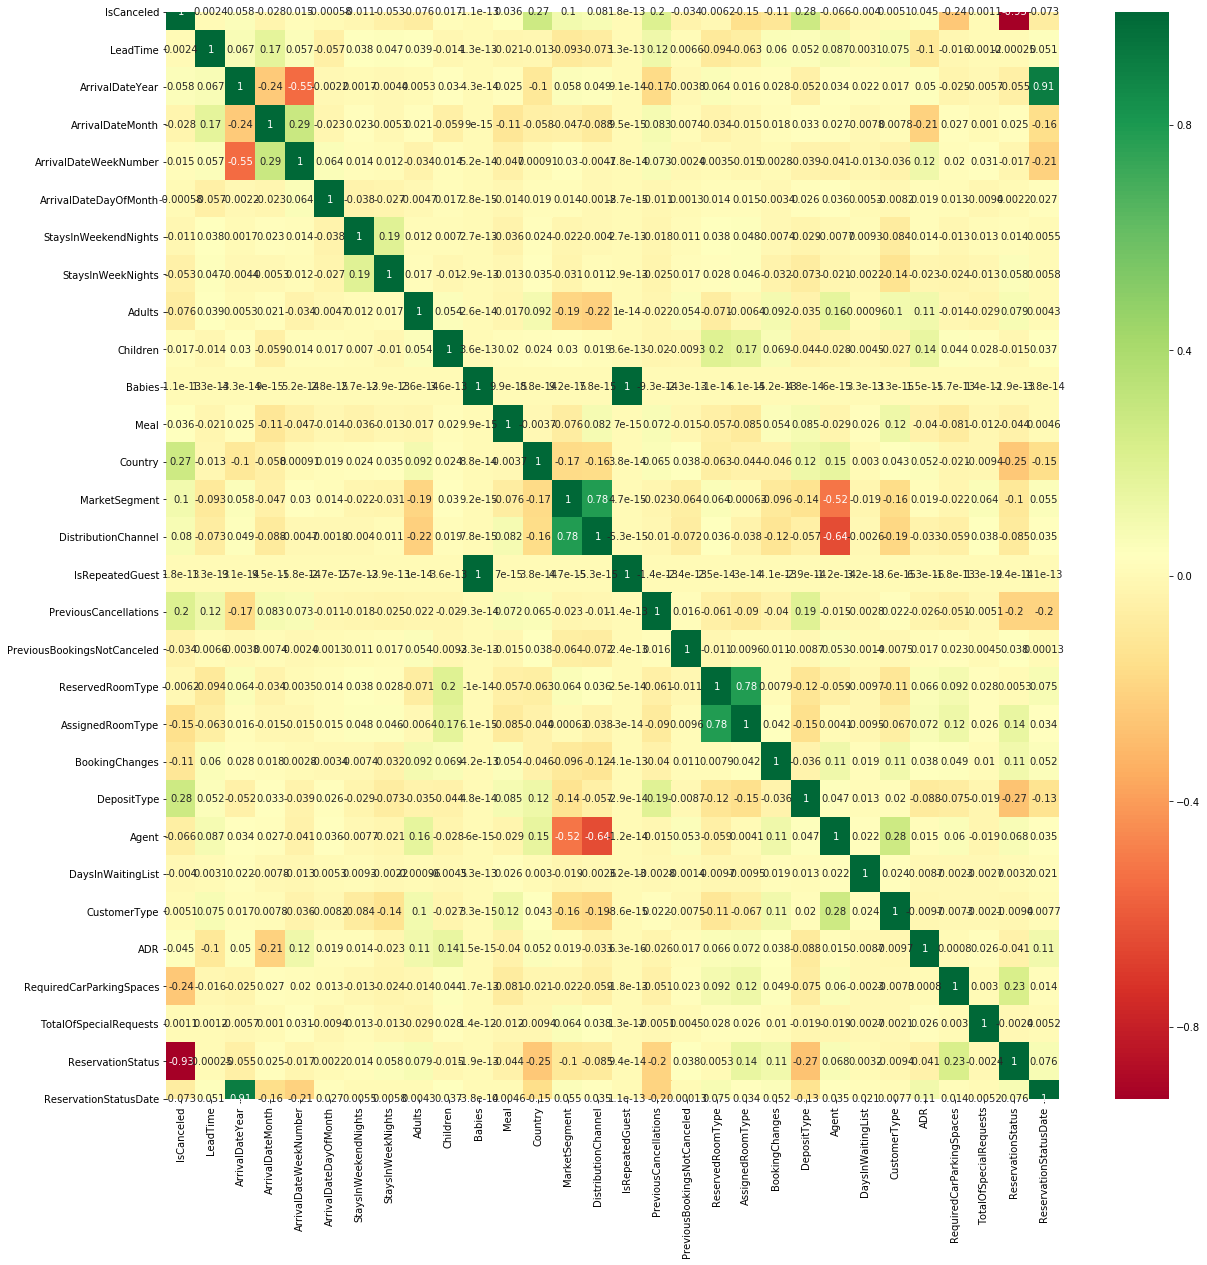

In [35]:

import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
#Correlation with output variable
cor_target = abs(corrmat['IsCanceled'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

IsCanceled           1.000000
ReservationStatus    0.928014
Name: IsCanceled, dtype: float64

## Wrapper Method

### Backward Elimination

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

print(selected_features_BE)
type(selected_features_BE)

### Recursive Feature Elimination

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 15)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ArrivalDateYear', 'Children', 'Meal', 'MarketSegment',
       'DistributionChannel', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'ReservationStatus'],
      dtype='object')


In [38]:
for c in X.columns:
    if c not in selected_features_rfe:
        X=X.drop(c,axis=1)
        X2=X2.drop(c,axis=1)

### Feature Importance

[2.05686660e-03 8.90858614e-04 1.88972908e-03 7.28615952e-03
 2.38793877e-03 9.87445634e-03 4.61594664e-04 3.48216640e-03
 6.92539942e-03 5.02552450e-03 2.00173279e-02 4.66355212e-05
 4.00681690e-03 3.00787892e-02 9.05569737e-01]


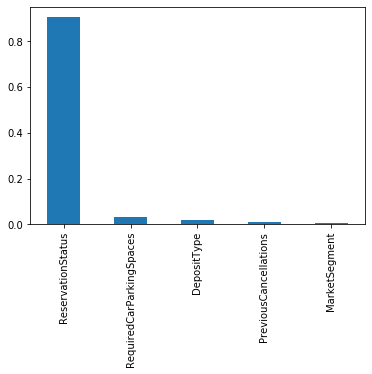

In [39]:


model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_ )#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [40]:
feat_importances.nlargest(10)

ReservationStatus           0.905570
RequiredCarParkingSpaces    0.030079
DepositType                 0.020017
PreviousCancellations       0.009874
MarketSegment               0.007286
AssignedRoomType            0.006925
BookingChanges              0.005026
ADR                         0.004007
ReservedRoomType            0.003482
DistributionChannel         0.002388
dtype: float64

# ...........

In [41]:
results={}

In [42]:
def result(predictions , model):
    print("Accuracy_Score",accuracy_score(y2,predictions.round()))
    cm = confusion_matrix(y2,predictions.round())
    print('Confusion matrix: \n\n',cm)
    print('Classification report: \n',classification_report(y2,predictions.round()))
    results.update({model:accuracy_score(y2,predictions.round())})
    
    

# PCA 

In [52]:


def transform_model():
    pca_transform = PCA(n_components=4)
    pca_transform.fit(X)
    transform_data = pca_transform.transform(X)
    transform_predict_data = pca_transform.transform(X2)
    return transform_data,transform_predict_data


In [58]:
def regressors():
    #RandomForest
    rf = RandomForestRegressor(n_estimators=10, random_state=0)    
    rf.fit(transform_data, y)
    predictions = rf.predict(transform_predict_data)
    predictions=predictions.astype(int)
    print("RANDOM FOREST REGRESSION \n")
    result(predictions ,'RandomForest')
    
    
    #KNN
    knn = KNeighborsClassifier(leaf_size=30,n_neighbors=5)
    knn.fit(transform_data,y)
    predictions=knn.predict(transform_predict_data)
    print("KNN CLASSIFIER \n")
    result(predictions , 'KNN')

    #Logistic Reg
    logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
    logreg.fit(transform_data,y)
    predictions=logreg.predict(transform_predict_data)
    print("LOGISTIC REGRESSION \n")
    result(predictions , 'LogisticReg')
    print(predictions)

    #SVM
    clf = svm.SVC(gamma='scale')
    clf.fit(transform_data, y)
    predictions=clf.predict(transform_predict_data)
    print("Support Vector Machines \n")
    result(predictions , 'SVM')

    #DECISION TREE

    model = DecisionTreeRegressor(max_depth=5)
    model.fit(transform_data,y)
    predictions=model.predict(transform_predict_data)
    print("Decision Tree \n")
    result(predictions,'DecisionTree')
    
    #GaussianNB
    gnb = GaussianNB()
    gnb.fit(transform_data,y)
    predictions=gnb.predict(transform_predict_data)
    print("GaussianNB \n")
    result(predictions,'GaussianNB')


In [59]:
#PCA
print("****************PCA*****************************")
transform_data,transform_predict_data=transform_model()
regressors()

****************PCA*****************************
RANDOM FOREST REGRESSION 

Accuracy_Score 0.6911251903148176
Confusion matrix: 

 [[33708  3281]
 [15586  8508]]
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.91      0.78     36989
           1       0.72      0.35      0.47     24094

    accuracy                           0.69     61083
   macro avg       0.70      0.63      0.63     61083
weighted avg       0.70      0.69      0.66     61083

KNN CLASSIFIER 

Accuracy_Score 0.6214495031350785
Confusion matrix: 

 [[16768 20221]
 [ 2902 21192]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.45      0.59     36989
           1       0.51      0.88      0.65     24094

    accuracy                           0.62     61083
   macro avg       0.68      0.67      0.62     61083
weighted avg       0.72      0.62      0.61     61083

LOGISTIC REGRESSION 

Accuracy_

# 

# 

# 

In [55]:
print(results)

{'RandomForest': 0.6911251903148176, 'KNN': 0.6214495031350785, 'LogisticReg': 0.7846209256257879, 'SVM': 0.596581700309415, 'DecisionTree': 0.5638884796097113, 'GaussianNB': 0.6298479118576363}


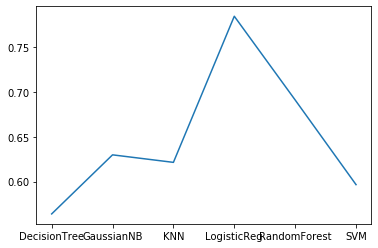

In [56]:
lists = sorted(results.items())
a,b=zip(*lists)
plt.plot(a,b)
plt.show()

([<matplotlib.axis.XTick at 0x7fac95016978>,
 <a list of 6 Text xticklabel objects>)

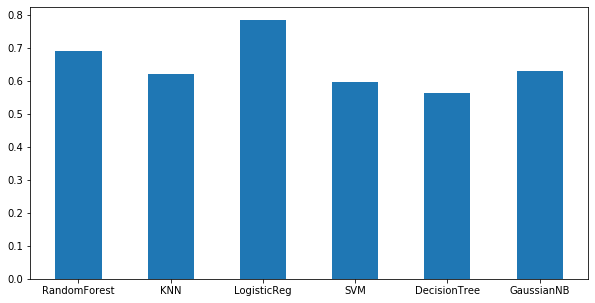

In [57]:
plt.subplots(figsize=(10,5))
plt.bar(range(len(results)), results.values(), align="center", width=0.5)
plt.xticks(range(len(results)), list(results.keys()))

In [66]:
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
logreg.fit(transform_data,y)
predictions = logreg.predict(transform_predict_data)

data2['prediction'] = predictions

In [68]:
data2[['IsCanceled', 'prediction']]

,IsCanceled,prediction
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,0
7,1,0
8,1,0
9,1,0


In [72]:
len(data2[data2['IsCanceled'] != data2['prediction']]) / 61083

0.21537907437421214